In [1]:
# This notebook explores the results for the agent based model

In [2]:
import re
import glob
import json
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option( 'display.max_columns', None )
pd.set_option( 'display.max_rows', None )

# Loading localidades GeoJSON for reference

In [ ]:
localidades = gpd.read_file( './data/geo/bogotá/localidades_no_sumapaz.json' )

In [ ]:
del localidades[ 'geometry' ]

In [ ]:
localidades.head()

In [ ]:
locs = {}
for i, row in localidades.iterrows():
    locs[ str( row[ 'codigo_localidad' ] ) ] = row[ 'localidad' ]
locs

# Loading ABM results

In [67]:
city = 'cartagena'
scenario = '4'
init_date = pd.to_datetime( '03/06/2020' )

In [68]:
path = './data/agents/{}/{}/*.csv'.format( city, scenario )

In [69]:
files = glob.glob( path )

In [70]:
files.sort()

In [71]:
agents = []
exp = 0

for file in files:
    df = pd.read_csv( file )
    df[ 'Fecha' ] = df[ 'Día' ].apply( lambda x: init_date + pd.DateOffset( days = x ) )
    df[ 'exp' ] = exp
    agents.append( df )
    exp = exp + 1

agents = pd.concat( agents )
del agents[ 'Unnamed: 0' ]

In [72]:
agents.shape

(6400, 41)

In [73]:
agents.dtypes

Susceptibles                                   int64
Total infectados                               int64
Graves                                         int64
Críticos                                       int64
Leves                                          int64
Recuperados                                    int64
Rt                                           float64
Recuento_zonas                                object
0-9                                           object
10-19                                         object
20-39                                         object
40-59                                         object
>60                                           object
En_cuarentena                                 object
Restringido_movilidad                         object
Vivos                                          int64
Día                                            int64
Contactos_prom_trabajo                       float64
Contactos_prom_transporte                    f

In [74]:
agents.tail()

,Susceptibles,Total infectados,Graves,Críticos,Leves,Recuperados,Rt,Recuento_zonas,0-9,10-19,20-39,40-59,>60,En_cuarentena,Restringido_movilidad,Vivos,Día,Contactos_prom_trabajo,Contactos_prom_transporte,Contactos_prom_casa,Contactos_prom_trabajo_conm,Contactos_prom_transporte_conm,Contactos_prom_casa_conm,Nuevos_infectados,Detectados,En_testing,En_cama,En_UCI,Detectados_por_intervencion,#Intervenidos,porcentaje_edad_activa_por_zona,porcentaje_edad_activa,tasa_letalidad_por_zona,tasa_letalidad,total_muertos,total_muertos_por_zona,total_muertos_edad_activa,total_muertos_edad_activa_por_zona,zonas intervenidas,Fecha,exp
195,23671,413,8,1,404,20315,0.295400,"{'Historica y del caribe norte': [7945, 0, 0, ...","[6919, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 0...","[6604, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 684, 0...","[4105, 0, 0, 210, 15, 0, 2, 0, 2, 0, 0, 0, 102...","[2808, 0, 0, 156, 9, 0, 4, 0, 4, 0, 0, 0, 7099...","[3235, 0, 0, 30, 1, 0, 2, 0, 2, 1, 0, 1, 2121,...","[18197, 128, 3, 0, 6605]","[0, 0, 0, 0, 0]",44399,195,2.819027,1.887993,1.155184,6.429775,4.306226,2.634799,25,322,0,67,8,0,0,{'De la virgen y turistica': 0.005792008330079...,0.004797,{'De la virgen y turistica': 0.022058823529411...,0.021277,7,"{'De la virgen y turistica': 3, 'Historica y d...",2,"{'De la virgen y turistica': 1, 'Historica y d...",{},2020-09-17,31
196,23655,400,8,1,391,20344,0.305000,"{'Historica y del caribe norte': [7938, 0, 0, ...","[6919, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 0...","[6604, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 685, 0...","[4096, 0, 0, 210, 12, 0, 2, 0, 2, 0, 0, 0, 102...","[2803, 0, 0, 146, 5, 0, 4, 0, 4, 0, 0, 0, 7114...","[3233, 0, 0, 28, 0, 0, 2, 0, 2, 1, 0, 1, 2125,...","[18602, 131, 3, 1, 8055]","[0, 0, 0, 0, 0]",44399,196,2.315435,1.546409,0.981036,5.838757,3.899529,2.473846,17,322,0,67,8,0,0,{'De la virgen y turistica': 0.005792008330079...,0.004797,{'De la virgen y turistica': 0.022058823529411...,0.021277,7,"{'De la virgen y turistica': 3, 'Historica y d...",2,"{'De la virgen y turistica': 1, 'Historica y d...",{},2020-09-18,31
197,23635,396,8,1,387,20368,0.290404,"{'Historica y del caribe norte': [7927, 0, 0, ...","[6919, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 0...","[6603, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 685, 0...","[4084, 0, 0, 214, 11, 0, 2, 0, 2, 0, 0, 0, 102...","[2796, 0, 0, 141, 5, 0, 3, 0, 3, 0, 0, 0, 7127...","[3233, 0, 0, 24, 2, 0, 3, 0, 2, 1, 0, 1, 2128,...","[17988, 93, 1, 0, 6193]","[0, 0, 0, 0, 0]",44399,197,2.996802,2.030789,1.210725,6.611757,4.480471,2.671189,18,322,1,67,8,0,0,{'De la virgen y turistica': 0.005792008330079...,0.004797,{'De la virgen y turistica': 0.022058823529411...,0.021277,7,"{'De la virgen y turistica': 3, 'Historica y d...",2,"{'De la virgen y turistica': 1, 'Historica y d...",{},2020-09-19,31
198,23605,397,7,1,389,20397,0.307305,"{'Historica y del caribe norte': [7913, 0, 0, ...","[6919, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 0...","[6603, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 686, 0...","[4067, 0, 0, 215, 14, 0, 2, 0, 2, 0, 0, 0, 102...","[2785, 0, 0, 141, 10, 0, 2, 0, 2, 0, 0, 0, 713...","[3231, 0, 0, 26, 1, 0, 3, 0, 2, 1, 0, 1, 2128,...","[17979, 97, 0, 1, 6435]","[0, 0, 0, 0, 0]",44399,198,2.913647,1.982747,1.179036,6.504903,4.426610,2.632272,26,322,1,67,8,0,0,{'De la virgen y turistica': 0.005792008330079...,0.004797,{'De la virgen y turistica': 0.022058823529411...,0.021277,7,"{'De la virgen y turistica': 3, 'Historica y d...",2,"{'De la virgen y turistica': 1, 'Historica y d...",{},2020-09-20,31
199,23585,378,7,1,370,20436,0.264550,"{'Historica y del caribe norte': [7900, 0, 0, ...","[6919, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 0...","[6603, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 687, 0...","[4055, 0, 0, 207, 16, 0, 3, 0, 2, 0, 0, 0, 102...","[2781, 0, 0, 131, 10, 0, 2, 0, 2, 0, 0, 0, 715...","[3227, 0, 0, 26, 2, 0, 2, 0, 1, 1, 0, 1, 2133,...","[17897, 105, 1, 0, 6446]","[0, 0, 0, 0, 0]",44399,199,2.940494,1.989414,1.197932,6.544110,4.427469,2.666015,28,322,2,67,8,0,0,{'De la virgen y turisti

In [75]:
def sum_quarantine( x ):
    x = json.loads( x )
    people_in_q = x[ 0 ] + x[ 1 ] + x[ 2 ] + x[ 3 ] + x[ 4 ]
    return people_in_q

In [76]:
agents_norm = []

for exp in agents[ 'exp' ].unique():
    df = agents.loc[ agents[ 'exp' ] == exp ]
    total_people = df[ 'Vivos' ].values[ 0 ]
    df[ 'Graves' ] = df[ 'Graves' ] / total_people
    df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
    df[ 'Fallecidos' ] = ( total_people - df[ 'Vivos' ] ) / total_people
    df[ 'R0' ] = ( df[ 'Nuevos_infectados' ].cumsum() / total_people )
    df[ 'Cuarentena' ] = df[ 'En_cuarentena' ].apply( lambda x: sum_quarantine( x ) ) / total_people
    agents_norm.append( df[ [ 'exp', 'Fecha', 'Graves', 'Críticos', 'Fallecidos', 'R0', 'Rt', 'Cuarentena' ] ] )

agents_norm = pd.concat( agents_norm )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [77]:
agents_norm.tail()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
195,31,2020-09-17,0.000180,0.000023,0.000158,0.465635,0.295400,0.561478
196,31,2020-09-18,0.000180,0.000023,0.000158,0.466018,0.305000,0.603342
197,31,2020-09-19,0.000180,0.000023,0.000158,0.466423,0.290404,0.546660
198,31,2020-09-20,0.000158,0.000023,0.000158,0.467009,0.307305,0.551997
199,31,2020-09-21,0.000158,0.000023,0.000158,0.467640,0.264550,0.550579


In [78]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

agents_norm_grouped = agents_norm.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
agents_norm_grouped.columns = [ '_'.join( col ).strip() for col in agents_norm_grouped.columns.values ]

In [79]:
agents_norm_grouped.tail()

,Graves_mean,Graves_ci,Críticos_mean,Críticos_ci,Fallecidos_mean,Fallecidos_ci,R0_mean,R0_ci,Rt_mean,Rt_ci,Cuarentena_mean
Fecha,,,,,,,,,,,
2020-09-17,0.000308,0.000029,0.000044,0.000010,0.000127,0.000018,0.464091,0.002255,0.300472,0.007294,0.560081
2020-09-18,0.000303,0.000028,0.000038,0.000009,0.000127,0.000018,0.464678,0.002244,0.305188,0.008465,0.606683
2020-09-19,0.000296,0.000027,0.000039,0.000008,0.000128,0.000018,0.465236,0.002229,0.325311,0.009788,0.544222
2020-09-20,0.000284,0.000024,0.000037,0.000008,0.000128,0.000018,0.466005,0.002212,0.336299,0.009024,0.549254
2020-09-21,0.000282,0.000023,0.000035,0.000008,0.000128,0.000018,0.466729,0.002196,0.323806,0.008683,0.550368


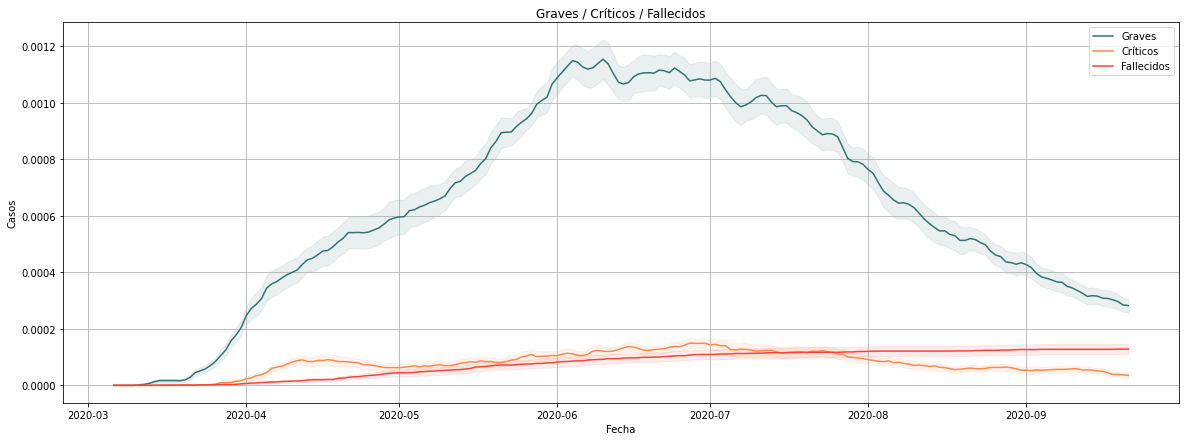

In [80]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Graves_mean' ], label = 'Graves', color = '#317372' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Graves_mean' ] - agents_norm_grouped[ 'Graves_ci' ] ), ( agents_norm_grouped[ 'Graves_mean' ] + agents_norm_grouped[ 'Graves_ci' ] ), color = '#317372', alpha = .1 )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Críticos_mean' ], label = 'Críticos', color = '#f98a4b' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Críticos_mean' ] - agents_norm_grouped[ 'Críticos_ci' ] ), ( agents_norm_grouped[ 'Críticos_mean' ] + agents_norm_grouped[ 'Críticos_ci' ] ), color = '#f98a4b', alpha = .1 )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Fallecidos_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Fallecidos_mean' ] - agents_norm_grouped[ 'Fallecidos_ci' ] ), ( agents_norm_grouped[ 'Fallecidos_mean' ] + agents_norm_grouped[ 'Fallecidos_ci' ] ), color = '#f64438', alpha = .1 )

plt.title( 'Graves / Críticos / Fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

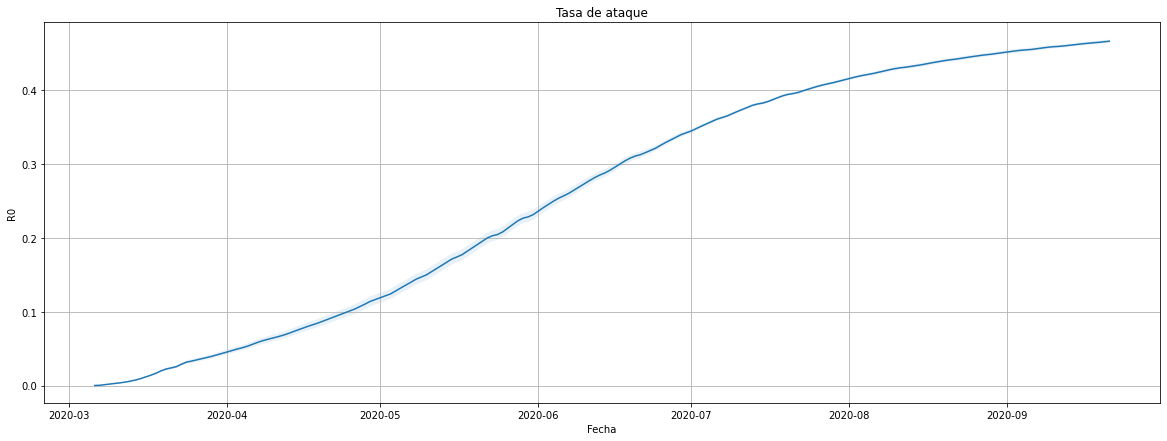

In [81]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'R0_mean' ] )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'R0_mean' ] - agents_norm_grouped[ 'R0_ci' ] ), ( agents_norm_grouped[ 'R0_mean' ] + agents_norm_grouped[ 'R0_ci' ] ), alpha = .1 )

plt.title( 'Tasa de ataque' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'R0' )
plt.grid( True )

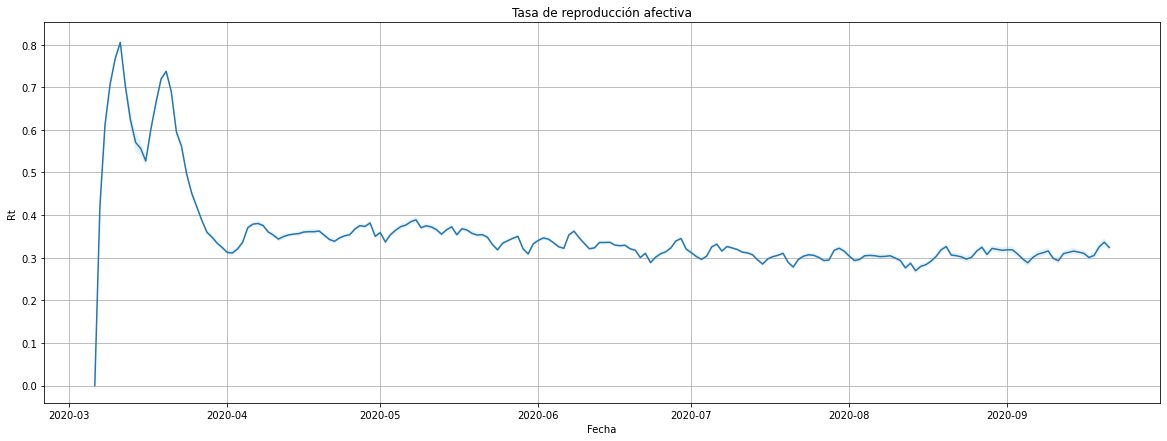

In [82]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Rt_mean' ] )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Rt_mean' ] - agents_norm_grouped[ 'Rt_ci' ] ), ( agents_norm_grouped[ 'Rt_mean' ] + agents_norm_grouped[ 'Rt_ci' ] ), alpha = .1 )

plt.title( 'Tasa de reproducción afectiva' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Rt' )
plt.grid( True )

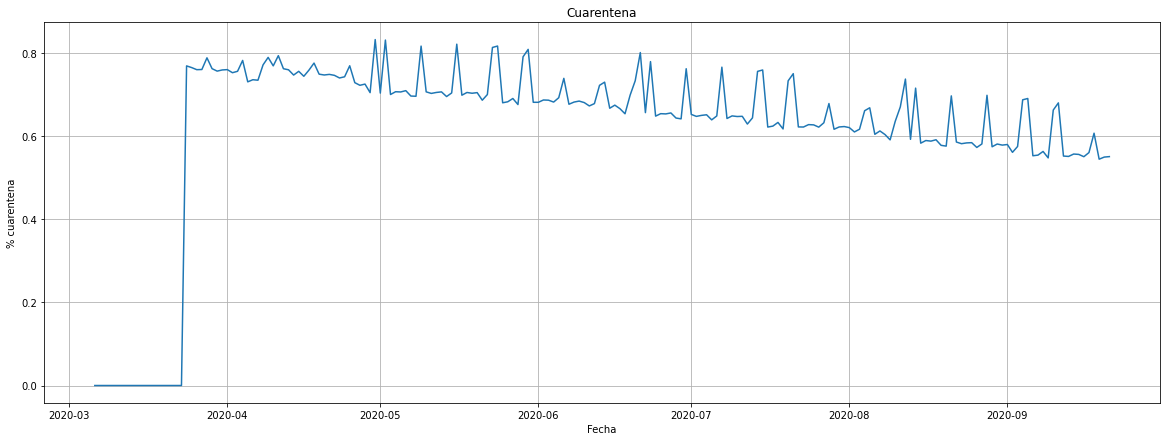

In [83]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Cuarentena_mean' ] )

plt.title( 'Cuarentena' )
plt.xlabel( 'Fecha' )
plt.ylabel( '% cuarentena' )
plt.grid( True )

In [84]:
agents_norm.tail()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
195,31,2020-09-17,0.000180,0.000023,0.000158,0.465635,0.295400,0.561478
196,31,2020-09-18,0.000180,0.000023,0.000158,0.466018,0.305000,0.603342
197,31,2020-09-19,0.000180,0.000023,0.000158,0.466423,0.290404,0.546660
198,31,2020-09-20,0.000158,0.000023,0.000158,0.467009,0.307305,0.551997
199,31,2020-09-21,0.000158,0.000023,0.000158,0.467640,0.264550,0.550579


In [85]:
agents_norm[ [ 'exp', 'Fecha', 'R0', 'Rt', 'Cuarentena' ] ].to_csv( './agents-viz/data/{}-agents-multi.csv'.format( city ), index = False )

In [86]:
pd.melt( agents_norm[ [ 'exp', 'Fecha', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-multi.csv'.format( city ), index = False )

In [87]:
agents_norm[ [ 'exp', 'Fecha', 'Graves', 'Críticos', 'Fallecidos', 'R0', 'Rt', 'Cuarentena' ] ].to_csv( './data/agents/clean/{}-{}.csv'.format( city, scenario ), index = False )

# By localidades

In [ ]:
recuento_zonas = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [ ]:
def expand_by_loc( x ):
    
    replacer = re.compile("(\d+)")
    x[ 'Recuento_zonas' ] = replacer.sub( r'"\1"', x[ 'Recuento_zonas' ] )
    if city in [ 'cartagena', 'barranquilla' ]:
        x[ 'Recuento_zonas' ] = x[ 'Recuento_zonas' ].replace( "'", '"' )
    #print( x[ 'Recuento_zonas' ] )
    
    x[ 'Recuento_zonas' ] = json.loads( x[ 'Recuento_zonas' ] )
    ds = []
    for z in x[ 'Recuento_zonas' ].keys():
        d = dict()
        d[ 'exp' ] = row[ 'exp' ]
        if city == 'bogota':
            d[ 'Localidad' ] = locs[ z ]
        else:
            d[ 'Localidad' ] = z
        d[ 'Día' ] = row[ 'Día' ]
        d[ 'Fecha' ] = init_date + pd.DateOffset( days = d[ 'Día' ] )
        for i in recuento_zonas.keys():
            d[ recuento_zonas[ i ] ] = int( x[ 'Recuento_zonas' ][ z ][ i ] )
        ds.append( d )
    
    return ds

agents_locs = []
for i, row in agents.iterrows():
    agents_locs = agents_locs + expand_by_loc( row )

agents_locs = pd.DataFrame( agents_locs )

In [ ]:
agents_locs_norm = []

for exp in agents_locs[ 'exp' ].unique():
    for loc in agents_locs[ 'Localidad' ].unique():
        df = agents_locs.loc[ ( agents_locs[ 'exp' ] == exp ) & ( agents_locs[ 'Localidad' ] == loc ) ]
        total_people = ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ).values[ 0 ]

        df[ 'Fallecidos' ] = ( total_people - ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ) ) / total_people
        df[ 'Graves' ] = df[ 'Graves' ] / total_people
        df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
        df[ 'R0' ] = ( df[ '?_4' ].cumsum() / total_people )
        agents_locs_norm.append( df[ [ 'exp', 'Fecha', 'Localidad', 'Graves', 'Críticos', 'Fallecidos', 'R0' ] ] )

agents_locs_norm = pd.concat( agents_locs_norm )

In [ ]:
agents_locs_norm[ 'Localidad' ] = agents_locs_norm[ 'Localidad' ].str.replace( '_', ' ' )

In [ ]:
agents_locs_norm.tail()

In [ ]:
agents_locs_norm[ [ 'exp', 'Fecha', 'Localidad', 'R0' ] ].to_csv( './agents-viz/data/{}-agents-locs-multi.csv'.format( city ), index = False )

In [ ]:
pd.melt( agents_locs_norm[ [ 'exp', 'Fecha', 'Localidad', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha', 'Localidad' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-locs-multi.csv'.format( city ), index = False )


# By age groups

In [ ]:
grupo_edad = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [ ]:
age_ranges = {
    'barranquilla': [ '0-9', '10-19', '20-39', '40-59', '>60' ],
    'bogota': [ '0-9', '10-19', '20-39', '40-59', '>60' ],
    'cartagena': [ '0-9', '10-19', '20-39', '40-59', '>60' ]
}

In [ ]:
def expand_by_age( x ):
    ds = []
    for a in age_ranges[ city ]:
        x[ a ] = json.loads( x[ a ] )
        d = dict()
        d[ 'exp' ] = row[ 'exp' ]
        d[ 'Grupo de edad' ] = a
        d[ 'Día' ] = row[ 'Día' ]
        d[ 'Fecha' ] = init_date + pd.DateOffset( days = d[ 'Día' ] )
        for i in range( 15 ):
            d[ grupo_edad[ i ] ] = x[ a ][ i ]
        ds.append( d )
    return ds

agents_ages = []
for i, row in agents.iterrows():
    agents_ages = agents_ages + expand_by_age( row )

agents_ages = pd.DataFrame( agents_ages )

In [ ]:
agents_ages_norm = []

for exp in agents_ages[ 'exp' ].unique():
    for age in agents_ages[ 'Grupo de edad' ].unique():
        df = agents_ages.loc[ ( agents_ages[ 'exp' ] == exp ) & ( agents_ages[ 'Grupo de edad' ] == age ) ]
        total_people = ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ).values[ 0 ]

        df[ 'Fallecidos' ] = ( total_people - ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ) ) / total_people
        df[ 'Graves' ] = df[ 'Graves' ] / total_people
        df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
        agents_ages_norm.append( df[ [ 'exp', 'Fecha', 'Grupo de edad', 'Graves', 'Críticos', 'Fallecidos' ] ] )

agents_ages_norm = pd.concat( agents_ages_norm )

In [ ]:
agents_ages_norm.tail()

In [ ]:
pd.melt( agents_ages_norm[ [ 'exp', 'Fecha', 'Grupo de edad', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha', 'Grupo de edad' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-ages-multi.csv'.format( city ), index = False )
